In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import KFold
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import mean_absolute_error

In [2]:
#load data
df = pd.read_csv("concrete_data.csv")
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
#clean data

#check datatypes
df.dtypes
df.shape

#remove duplicate rows
#df["duplicates"] = df.duplicated()
#df = df[df.duplicates == False]
#df.drop("duplicates", axis=1, inplace=True)
#print(df)
#df.shape

(1030, 9)

In [4]:
#EDA
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [5]:
# train/test split 
y = df.pop("Strength")

x_train, x_test, y_train, y_test = train_test_split(df, y)

print(x_train)
print(y_train)
print(x_test)
print(y_test)

      Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
387    520.0                 0.0      0.0  175.0               5.2   
282    251.4                 0.0    118.3  188.5               6.4   
571    228.0               342.1      0.0  185.7               0.0   
73     425.0               106.3      0.0  151.4              18.6   
1013   355.9                 0.0    141.6  193.3              11.0   
...      ...                 ...      ...    ...               ...   
695    116.0               173.0      0.0  192.0               0.0   
267    212.0                 0.0    124.8  159.0               7.8   
460    178.0               129.8    118.6  179.9               3.6   
874    313.0                 0.0    113.0  178.0               8.0   
782    296.0                 0.0      0.0  192.0               0.0   

      Coarse Aggregate  Fine Aggregate  Age  
387              870.0           805.0   28  
282             1028.4           757.7   56  
571              955.

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.0,192.375,272.9,350.00,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.0,0.000,22.0,142.95,359.4
Fly Ash,1030.0,54.188350,63.997004,0.0,0.000,0.0,118.30,200.1
Water,1030.0,181.567282,21.354219,121.8,164.900,185.0,192.00,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.0,0.000,6.4,10.20,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.0,932.000,968.0,1029.40,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.0,730.950,779.5,824.00,992.6
Age,1030.0,45.662136,63.169912,1.0,7.000,28.0,56.00,365.0


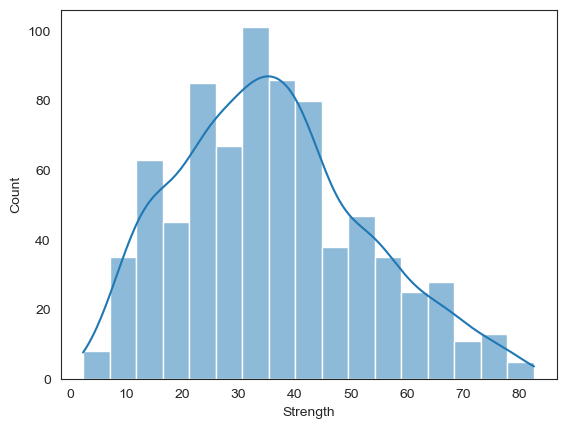

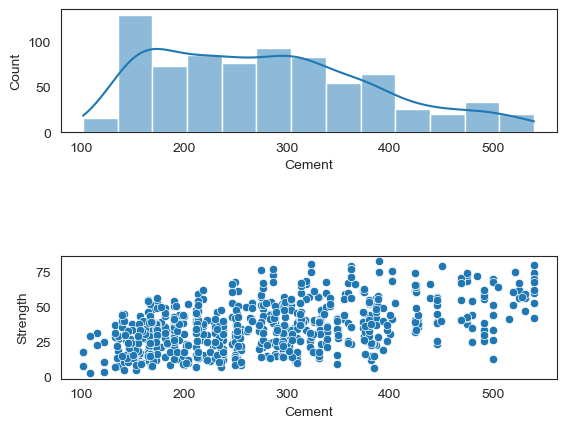

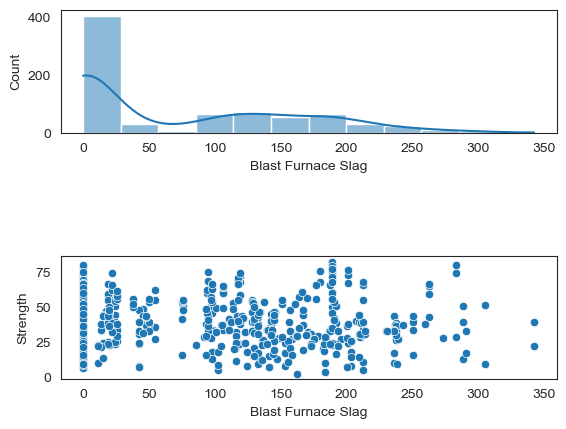

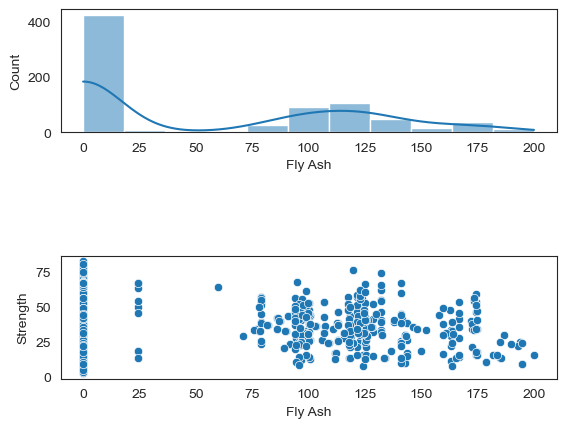

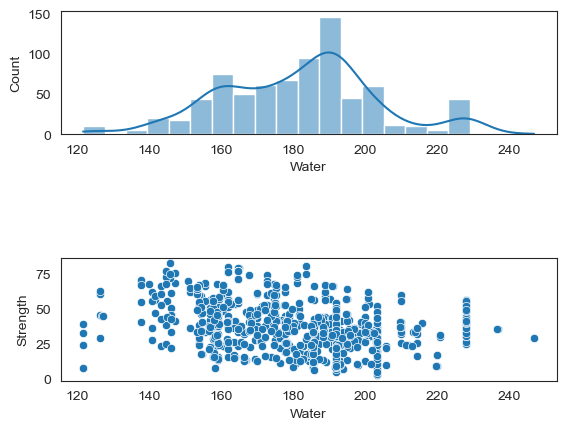

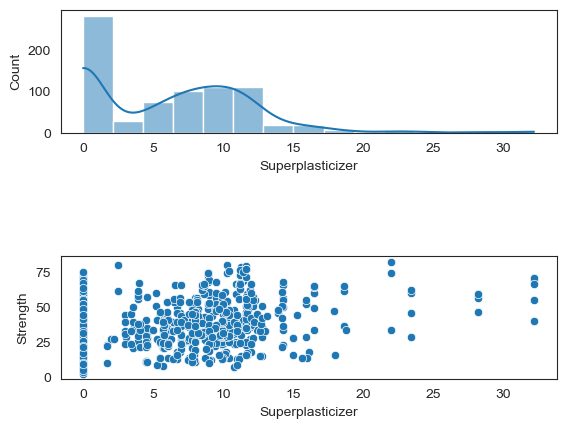

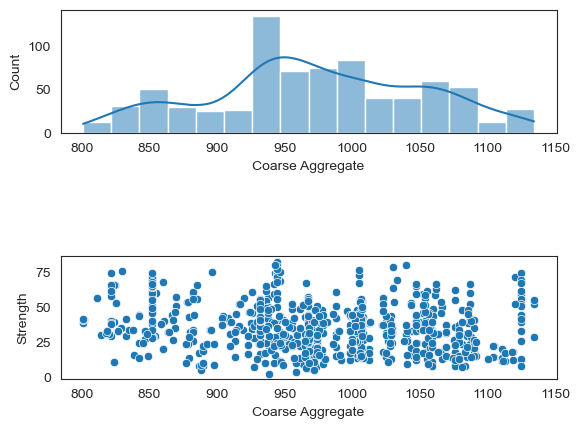

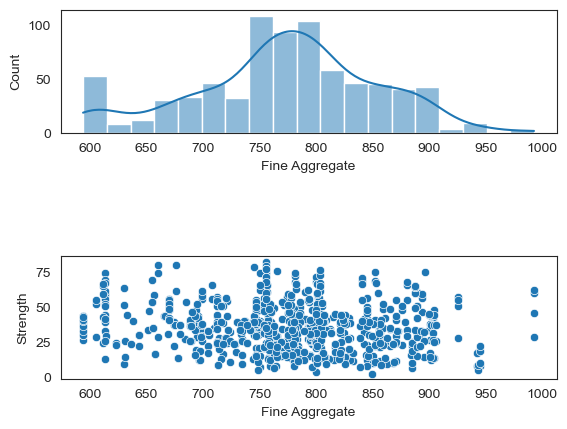

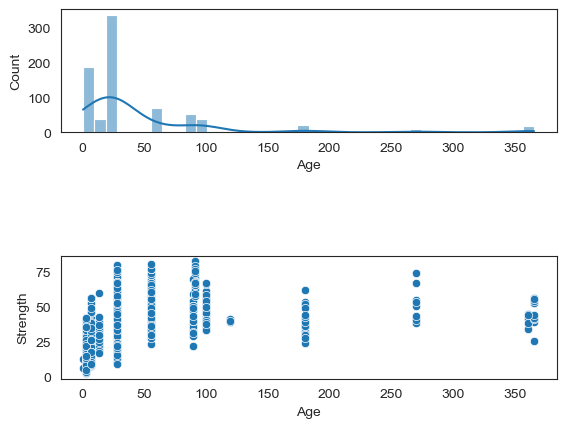

In [7]:
columns = df.columns.tolist()
sns.set_style('white')

concat_df = x_train.join(y_train) 

sns.histplot(data=y_train, kde=True)

for col in columns:
    fig, ax = plt.subplots(2,1)
    plt.subplots_adjust(hspace=1) 
    
    #univariate
    sns.histplot(data=concat_df[col], kde=True, ax=ax[0])
    
    #bivariate
    sns.scatterplot(x=col,
                    y="Strength",
                    data=concat_df, ax=ax[1])
    


In [8]:
#Remove outliers

#Winsorizing: Replace extreme values with a specified percentile value from the data (e.g., replacing the highest value with the 95th percentile). 
#Trimming: Remove a certain percentage of data points from the extreme tails of the distribution. 
#Log transformation: Can be used to normalize skewed data, especially when the outliers are concentrated at the high end. 

#replace nulls 

#Impute/Standardize

#normalize rather than standardize for non normally distirbuted features 

scaler = MinMaxScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train),columns = x_train.columns)

x_test = pd.DataFrame(scaler.transform(x_test),columns = x_test.columns)

print(x_train)
print(x_test)

       Cement  Blast Furnace Slag   Fly Ash     Water  Superplasticizer  \
0    0.954338            0.000000  0.000000  0.424920          0.161491   
1    0.341096            0.000000  0.591204  0.532748          0.198758   
2    0.287671            1.000000  0.000000  0.510383          0.000000   
3    0.737443            0.310728  0.000000  0.236422          0.577640   
4    0.579680            0.000000  0.707646  0.571086          0.341615   
..        ...                 ...       ...       ...               ...   
767  0.031963            0.505700  0.000000  0.560703          0.000000   
768  0.251142            0.000000  0.623688  0.297125          0.242236   
769  0.173516            0.379421  0.592704  0.464058          0.111801   
770  0.481735            0.000000  0.564718  0.448882          0.248447   
771  0.442922            0.000000  0.000000  0.560703          0.000000   

     Coarse Aggregate  Fine Aggregate       Age  
0            0.207021        0.529353  0.074176  

In [9]:
#train baseline


scores = dict()
model = SVR()

model.fit(x_train,y_train)

preds = model.predict(x_test)

scores["Baseline"] = mean_absolute_error(y_test, preds)

print(scores)

{'Baseline': 8.759093570302252}


In [10]:
#feature selection 


kf = KFold(n_splits=5)

pipeline = Pipeline(steps=[("SelectKBest", SelectKBest(f_regression)), ("SVR", SVR())])

params = {"SelectKBest__k":list(np.arange(1,9,1))}

clf = GridSearchCV(estimator=pipeline,cv=kf, param_grid=params)

clf.fit(x_test, y_test)

print(clf.best_params_)
print(clf.best_estimator_.named_steps.SelectKBest.get_feature_names_out().tolist())

model=SVR()

model.fit(x_train[clf.best_estimator_.named_steps.SelectKBest.get_feature_names_out().tolist()], y_train)
preds = model.predict(x_test[clf.best_estimator_.named_steps.SelectKBest.get_feature_names_out().tolist()])

scores["Best Features Baseline"] = mean_absolute_error(y_test, preds)

print(scores)

x_train = x_train[clf.best_estimator_.named_steps.SelectKBest.get_feature_names_out().tolist()]
x_test = x_test[clf.best_estimator_.named_steps.SelectKBest.get_feature_names_out().tolist()]

{'SelectKBest__k': 5}
['Cement', 'Water', 'Superplasticizer', 'Fine Aggregate', 'Age']
{'Baseline': 8.759093570302252, 'Best Features Baseline': 8.098639731863404}


In [11]:
#train hyperparameters

#kernel
#C
#epsilon

#linear kernel 

model=SVR()

params = {"C":[.1, 1, 10, 100], "kernel":["linear"], "epsilon":[.5,1,2,4,8]}

clf = GridSearchCV(estimator=model, cv=kf, param_grid=params)

clf.fit(x_train, y_train)


model = SVR(C=clf.best_params_["C"], epsilon=clf.best_params_["epsilon"],kernel="linear")
model.fit(x_train, y_train)

y_preds = model.predict(x_test)

scores["Linear Kernel: " + str(clf.best_params_)] = mean_absolute_error(y_test, y_preds)

print(scores)


{'Baseline': 8.759093570302252, 'Best Features Baseline': 8.098639731863404, "Linear Kernel: {'C': 10, 'epsilon': 8, 'kernel': 'linear'}": 9.299764071066207}


In [13]:
#polynomial kernel 

model=SVR()

params = {"C":[.1, 1, 10, 100], "kernel":["poly"], "degree":[1,2,3],"epsilon":[.5,1,2,4,8]}

clf = GridSearchCV(estimator=model, cv=kf, param_grid=params)

clf.fit(x_train, y_train)


model = SVR(C=clf.best_params_["C"], epsilon=clf.best_params_["epsilon"],kernel="poly",degree=clf.best_params_["degree"])
model.fit(x_train, y_train)

y_preds = model.predict(x_test)

scores["Polynomial Kernel: " + str(clf.best_params_)] = mean_absolute_error(y_test, y_preds)

print(scores)

{'Baseline': 8.759093570302252, 'Best Features Baseline': 8.098639731863404, "Linear Kernel: {'C': 10, 'epsilon': 8, 'kernel': 'linear'}": 9.299764071066207, "Polynomial Kernel: {'C': 100, 'degree': 3, 'epsilon': 8, 'kernel': 'poly'}": 6.989250381802738}


In [14]:
#rbf kernel 

model=SVR()

params = {"C":[.1, 1, 10, 100], "kernel":["rbf"], "epsilon":[.5,1,2,4,8]}

clf = GridSearchCV(estimator=model, cv=kf, param_grid=params)

clf.fit(x_train, y_train)


model = SVR(C=clf.best_params_["C"], epsilon=clf.best_params_["epsilon"],kernel="rbf")
model.fit(x_train, y_train)

y_preds = model.predict(x_test)

scores["RBF Kernel: " + str(clf.best_params_)] = mean_absolute_error(y_test, y_preds)

print(scores)

{'Baseline': 8.759093570302252, 'Best Features Baseline': 8.098639731863404, "Linear Kernel: {'C': 10, 'epsilon': 8, 'kernel': 'linear'}": 9.299764071066207, "Polynomial Kernel: {'C': 100, 'degree': 3, 'epsilon': 8, 'kernel': 'poly'}": 6.989250381802738, "RBF Kernel: {'C': 100, 'epsilon': 2, 'kernel': 'rbf'}": 5.196053379125304}


In [16]:
#interpret model
#feature importance

from sklearn.inspection import permutation_importance

model = SVR(C=100, epsilon=2,kernel="rbf")

model.fit(x_train,y_train)

res = permutation_importance(model, x_test, y_test,n_repeats=30,random_state=0)

res = {x_test.columns.tolist()[i]: res.importances_mean[i] for i in range(len(res.importances_mean))}

df = pd.DataFrame(res.items(), columns=["feature", "value"])

print(df.sort_values('value', key=abs, ascending=False))

            feature     value
4               Age  0.687936
0            Cement  0.510143
1             Water  0.212220
2  Superplasticizer  0.201501
3    Fine Aggregate  0.144340
